In [1]:
# Pricing digital option modello CEV con metodo Crank-Nicholson (theta = 0.5)

import math as mt
import numpy as np

In [2]:
## input

# mercato
r = 0.001
S0 = 1
K = 1
T = 1
# calibrazione
sigma = 0.4
beta = 0.5
# discretizzazione
M = 1000
N = 1500
# theta metodo (Crank-Nicholson)
theta = 0.5

In [3]:
# griglia

Smin = 0.2*S0
Smax = 4*S0

dS = (Smax-Smin)/N
dt = T/M

S = np.zeros((N+1,1))
for i in range(0,N+1):
    S[i,0] = Smin + i*dS


In [4]:
# Matrice L
L = np.zeros((N+1,N+1))
for i in range(1,N):
    L[i,i-1] = (1-theta)*(-(r*S[i,0])/(2*dS) + sigma**2/(2*dS**2)*(S[i,0]**(2*(beta))))     # A
    L[i,i] = -1/dt + (1-theta)*(-sigma**2/(dS**2)*(S[i,0]**(2*(beta))) - r)                 # B
    L[i,i+1] = (1-theta)*((r*S[i,0])/(2*dS) + sigma**2/(2*dS**2)*(S[i,0]**(2*(beta))))      # C
# Condizioni al bordo per L
L[-1,-1] = 1
L[0,0]=1

# Matrice R
R = np.zeros((N+1,N+1))
for i in range(1,N):
    R[i,i-1] = (-theta)*(-(r*S[i,0])/(2*dS) + sigma**2/(2*dS**2)*(S[i,0]**(2*(beta))))      # D
    R[i,i] = -1/dt + (-theta)*(-sigma**2/(dS**2)*(S[i,0]**(2*(beta))) - r)                  # E
    R[i,i+1] = (-theta)*((r*S[i,0])/(2*dS) + sigma**2/(2*dS**2)*(S[i,0]**(2*(beta))))       # F


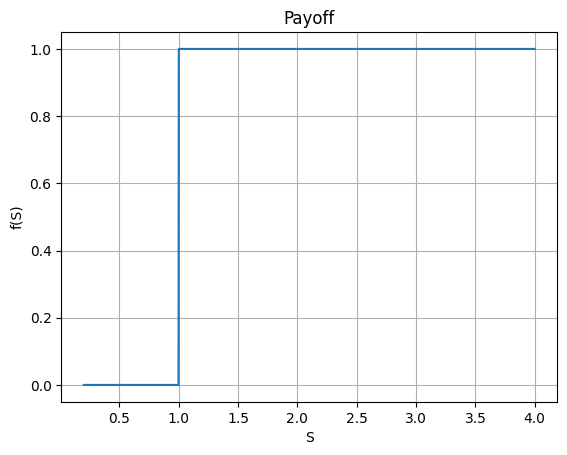

In [5]:
# Condizione finale

f = np.zeros((N+1,1))
for i in range(0,N+1):
    f[i,0] = 1 if (S[i,0]>K) else 0  

from matplotlib import pyplot as plt
plt.plot(S, f)

# Abbellimento grafico
plt.grid(True)
plt.xlabel('S')
plt.ylabel('f(S)')
plt.title('Payoff')
plt.show()

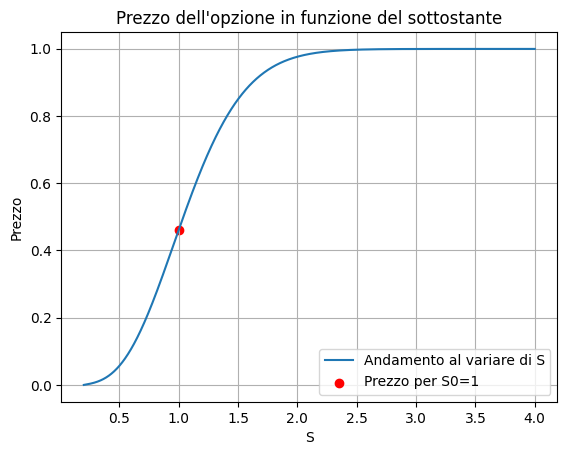

In [6]:
# Risoluzione sistema
rhs = np.zeros((N+1,1))
bc = np.zeros((N+1,1))
for j in range(M,0,-1):
    # termine noto del sistema lineare
    bc[0,0] = 0
    bc[N,0] = mt.exp(-r*(T-(j-1)*dt))
    rhs = np.matmul(R,f)
    rhs = np.add(rhs,bc)
    # risolvo
    f = np.linalg.solve(L,rhs)

plt.plot(S, f, label="Andamento al variare di S")

# Abbellimento grafico
plt.grid(True)
plt.xlabel('S')
plt.ylabel('Prezzo')
plt.title("Prezzo dell'opzione in funzione del sottostante")
plt.scatter(S0, np.interp(S0, S.flatten(), f.flatten()), color='red', label="Prezzo per S0=1")      # Prezzo nel caso di S0=1
plt.legend()
plt.show()

In [7]:
# Calcolare il prezzo
S = S.flatten() # da matrice a vettore
f = f.flatten()
Prezzo = np.interp(S0, S, f)
print(Prezzo)

0.4611530151142261


In [8]:
# Calcolo del prezzo sotto l'ipotesi che il sottostante evolve come moto browniano geometrivo BSM
# (E' una soluzione esatta per beta=1)

from math import log, sqrt, exp
from scipy.stats import norm

def d2(S,K,r,T,sigma):
    return (log(S/K)+(r-sigma**2/2)*T)/(sigma*sqrt(T))

PrezzoBS = exp(-r*T)*norm.cdf(d2(S0,K,r,T,sigma))

print(PrezzoBS)

0.42129663336761874
